In [1]:
#required imports

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import theano.tensor as tt
import seaborn as sns

from IPython.display import Image

%matplotlib inline

/home/isaac/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import quandl
quandl.ApiConfig.api_key = '---51qxPCEF_9smvn8Ec'

In [3]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.tools as tls

In this assignment you will use Baysesian approach for analysis of stock return data.
In particuler you will model the data as a normal and T-student distributions and will estimate distribution parameters using Markov chain Monte Carlo technique (MCMC).

The MCMC sampler draws parameter values from the prior distribution and computes the likelihood that the observed data came from a distribution with these parameter values.
It is recommended to use PyMC library for these computations; PyMC is a Python library for Bayesian analysis.

### 1. Returns

Extract historical data for Apple (AAPL) [2015 - 2016], calculate daily returns, and estimate the mean daily return. Remove NaN from dataset.
Plot histogram of daily returns.

Use code below to download data. 

**NOTE:** 
    The `.csv` file included with the assignment include the same data as below. 
    Use that file instead if you aren't able to read the data, or if you have 
    reached the limit for calls to the API.

In [4]:
## Get the data:
from pandas_datareader import data
#If the above fails, you might need to do 
#conda install pandas-datareader
#or
#pip install pandas-datareader
#Depending on your setup

from datetime import datetime

In [5]:


#returns = data.DataReader('WIKI/AAPL', 'quandl', start='2015-1-1', 
#                          end='2016-12-31')['AdjClose'].pct_change()

returns = pd.read_csv('AAPL_returns.csv', header = 0)['Adj_Close'].pct_change()

print(len(returns))

503


In [6]:
returns = returns.dropna()*100
returns

1     -9.672900e+01
2      1.566238e+03
3     -2.473689e+02
4     -6.872153e+01
5     -4.354447e+02
6     -1.141917e+02
7      1.820833e+02
8      1.167034e+02
9     -7.748260e+01
10     3.205439e+02
11    -1.000000e+02
12             -inf
13    -1.349652e+02
14    -3.799325e+02
15    -3.946499e+01
16     5.527888e-02
17    -2.145824e+01
18    -1.947717e+02
19    -1.515257e+02
20    -3.521602e+02
21    -9.588389e+00
22    -8.839656e+01
23     9.980281e+01
24    -3.540445e+02
25    -2.022982e+02
26    -1.122181e+02
27     2.287209e+03
28    -9.331323e+01
29    -1.364000e+02
30    -7.297382e+03
           ...     
473   -1.466752e+01
474   -1.684545e+01
475    1.560881e+02
476    8.330286e+01
477   -1.769548e+01
478   -6.499230e+01
479   -2.286973e+02
480   -1.831240e+02
481    7.819948e+00
482   -9.778534e+01
483    7.251239e+03
484   -2.198525e+02
485   -3.033025e+02
486    7.721709e+01
487   -1.678099e+02
488   -1.029242e+02
489    3.838467e+02
490    3.939149e+02
491   -7.011955e+01


In [7]:
returns = pd.DataFrame(returns)

In [8]:
returns.head(20)

,Adj_Close
1,-96.728997
2,1566.238438
3,-247.368924
4,-68.721528
5,-435.444747
6,-114.191745
7,182.083253
8,116.703449
9,-77.482597
10,320.543947


In [9]:
returns = returns.loc[returns['Adj_Close']!=returns['Adj_Close'].min()]

In [10]:
returns.info

<bound method DataFrame.info of         Adj_Close
1      -96.728997
2     1566.238438
3     -247.368924
4      -68.721528
5     -435.444747
6     -114.191745
7      182.083253
8      116.703449
9      -77.482597
10     320.543947
11    -100.000000
13    -134.965233
14    -379.932494
15     -39.464986
16       0.055279
17     -21.458239
18    -194.771659
19    -151.525668
20    -352.160237
21      -9.588389
22     -88.396562
23      99.802814
24    -354.044515
25    -202.298166
26    -112.218090
27    2287.208960
28     -93.313228
29    -136.400017
30   -7297.381581
31     -50.081821
..            ...
473    -14.667521
474    -16.845452
475    156.088117
476     83.302857
477    -17.695483
478    -64.992301
479   -228.697340
480   -183.123996
481      7.819948
482    -97.785342
483   7251.239165
484   -219.852495
485   -303.302495
486     77.217089
487   -167.809891
488   -102.924202
489    383.846698
490    393.914898
491    -70.119548
492    231.426700
493   -131.186023
494    256.246

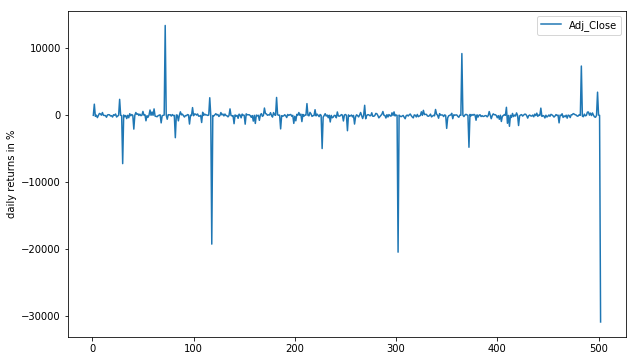

In [11]:
returns.plot(figsize=(10, 6))
plt.ylabel('daily returns in %');

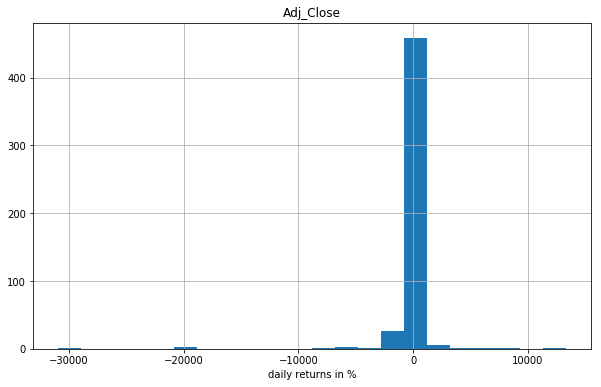

In [12]:
returns.hist(figsize=(10, 6), bins = 22)
plt.xlabel('daily returns in %');

Build a model that assumes the daily returns follow a normal distribution,
i.e. use normal distibution for likelihood computation.
Use 2 different prior distributions of parameters (for example, Uniform and Normal): Mean $\mu$ and Standard Deviation $\sigma$.

Present posterior distribution graphically. 

In [13]:
returns.mean()

Adj_Close   -234.593099
dtype: float64

In [14]:
from IPython.core.pylabtools import figsize

In [25]:
# YOUR CODE HERE

with pm.Model() as model:
    # define the prior
    mean = pm.DiscreteUniform('mean', lower=-1000, upper=1000)  # prior_1, Uniform
    #sigma = pm.Normal('sigma', mu = 0, sd = 1) # prior_2, Normal
    sigma = pm.Gamma('sigma', alpha=0.75, beta=1)
    
    # define the likelihood
    y = pm.Normal('y', mu = mean, sd = sigma, observed = returns)

    # Generate a MCMC chain
    start = pm.find_MAP()  # Find starting value by optimization
    step = pm.NUTS()  # Instantiate NUTS sampler
    trace_likelihood_normal = pm.sample(10000, step, start=start, progressbar=False)

# create an array with the posterior sample
mean_sample = trace['mean']
sigma_sample = trace['sigma']

logp = -6,068.1, ||grad|| = 733.77: 100%|██████████| 26/26 [00:00<00:00, 2295.44it/s]        
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [sigma]
>Metropolis: [mean]
The number of effective samples is smaller than 10% for some parameters.


In [26]:
# Let's graph

The model run can be visualized with pyMC3 built-in traceplot

### Trace Model Parameters

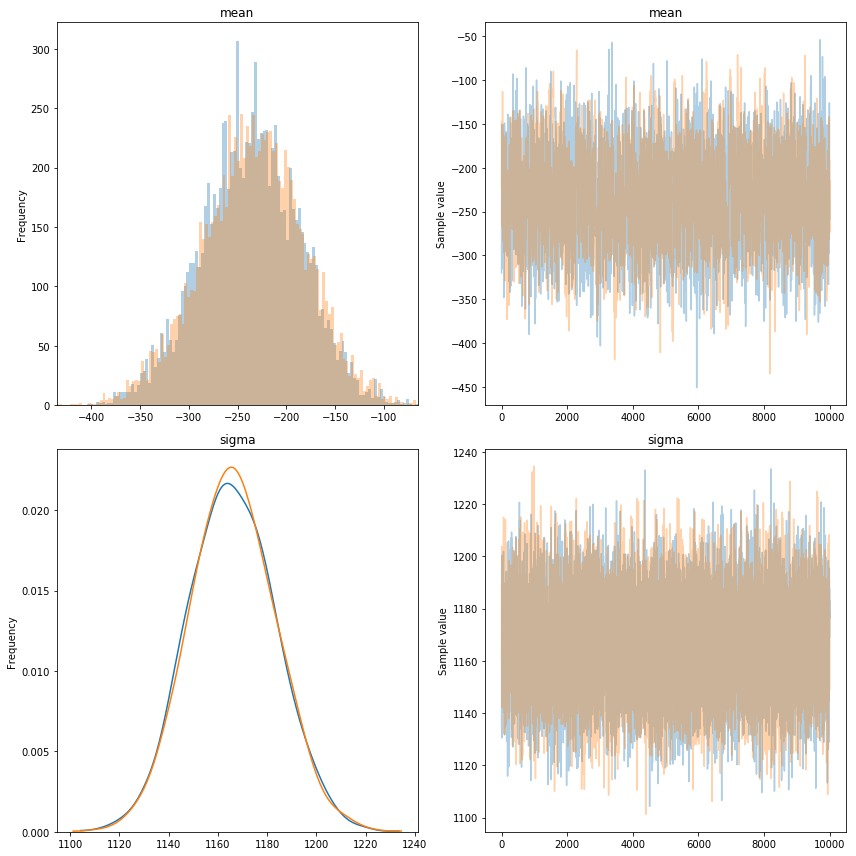

In [27]:
pm.traceplot(trace_likelihood_normal, figsize = (12, 12));

### Posterior Distribution of Model Parameters

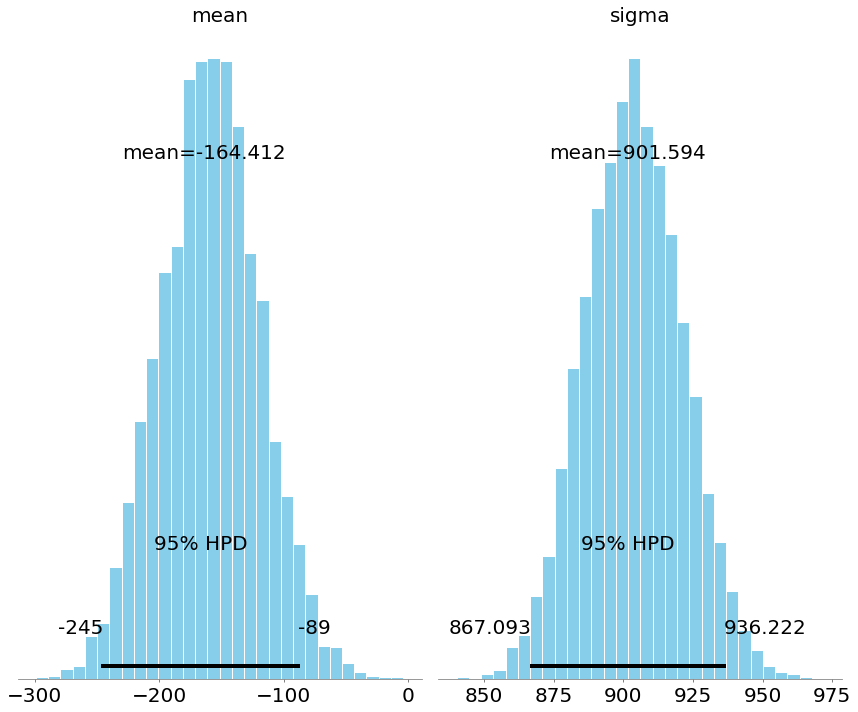

In [24]:
pm.plot_posterior(trace_likelihood_normal, figsize= (12, 10), text_size= 20);

In [22]:
# END

Build a model that assumes the daily returns follow a T-Student distribution,
i.e. use t-Student distibution for likelihood computation.

Use 2 different prior distributions of parameters (for example, Uniform and Normal): Mean
μ and Standard Deviation σ.

In [28]:
# YOUR CODE HERE

with pm.Model() as model:
    # define the prior
    mean = pm.DiscreteUniform('mean', lower=-1000, upper=1000)  # prior_1, Uniform
    #sigma = pm.Normal('sigma', mu = 0, sd = 1) # prior_2, Normal
    sigma = pm.Gamma('sigma', alpha=0.75, beta=1)
    
    # define the likelihood
    y = pm.StudentT('y',nu = 501, mu = mean, sd = sigma, observed = returns)

    # Generate a MCMC chain
    start = pm.find_MAP()  # Find starting value by optimization
    step = pm.NUTS()  # Instantiate NUTS sampler
    trace_likelihood_student = pm.sample(10000, step, start=start, progressbar=False)

# create an array with the posterior sample
mean_sample = trace['mean']
sigma_sample = trace['sigma']

logp = -5.6595e+05, ||grad|| = 2.3134e+05: 100%|██████████| 8/8 [00:00<00:00, 1542.02it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [sigma]
>Metropolis: [mean]
The number of effective samples is smaller than 25% for some parameters.


### Trace Model Parameters

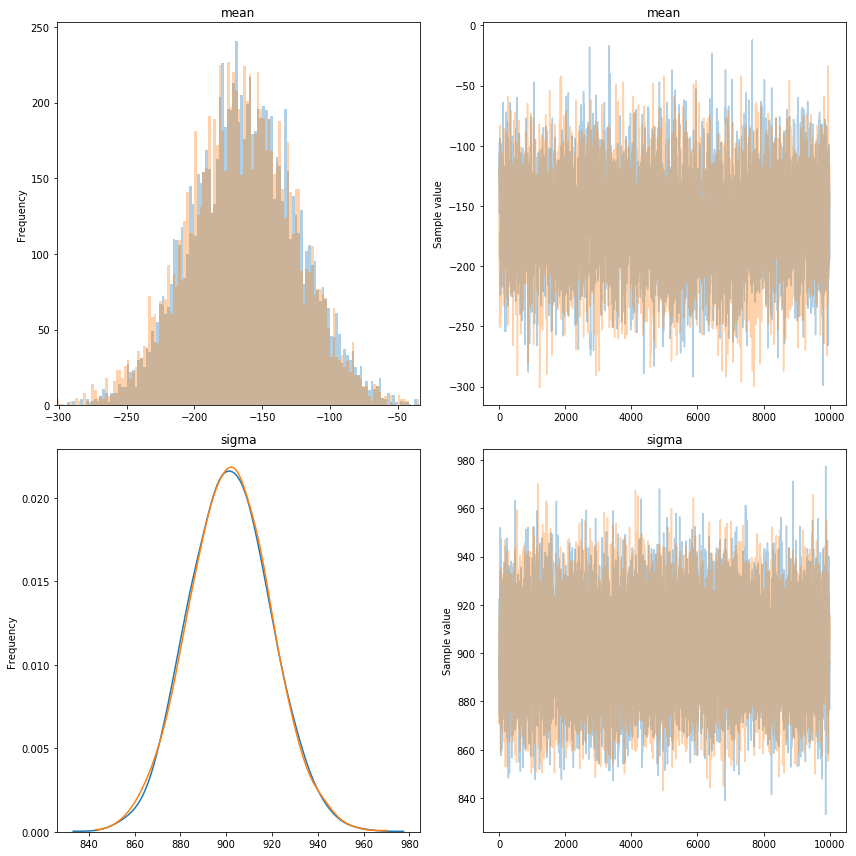

In [29]:
pm.traceplot(trace_likelihood_student, figsize = (12, 12));

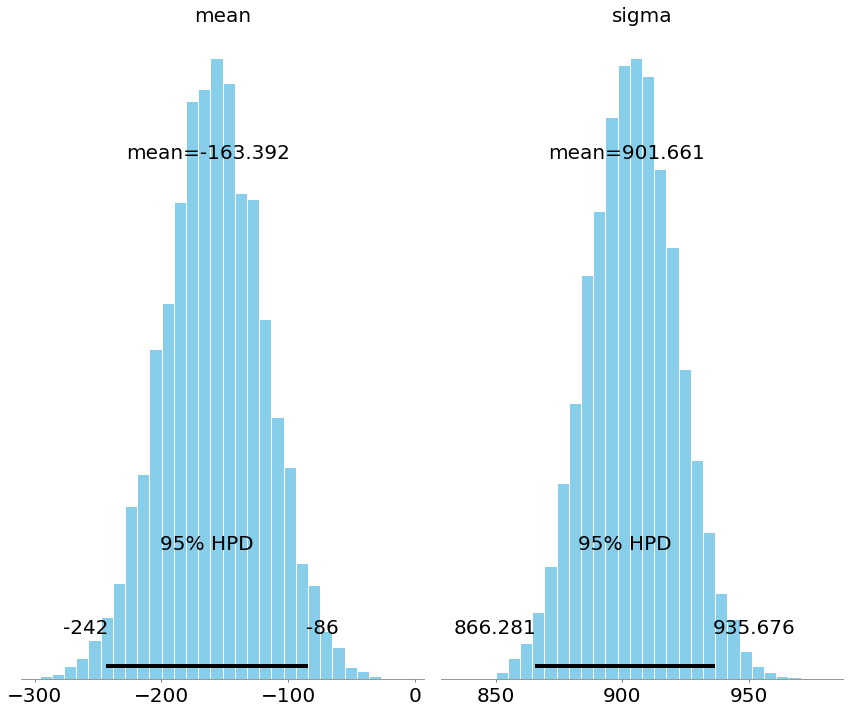

In [30]:
pm.plot_posterior(trace_likelihood_student, figsize= (12, 10), text_size= 20);

### Summary & Conclusion
- Identify parameters of interest in both cases:  

    - Mean and Standard Deviation

- What are good priors for the identified parameters?  

    - Uninform Distribution for Mean and Gamma Distribution for Standard Deviation

- Compare the two models, which model is better?  
  
    - The T-Student likelihood model is better since it has higher mean but a bit higher standard deviation.
    - The approximate mean is -163.392 and standard deviation is 901.661

- What is your HDI estimate?     

    - Mean: [-242, -86]
    - Standard Deviation: [866.281, 935.676]

- How can you improve the models?  

    - To improve the models and thus make our posterior narrower, we need more trials.
    - We need more overall information so that our likelihood overtakes the effect of prior of and makes
      the posterior narrower.

- How many samples to use?  

    - The more the better since we want to our likelihood to overtake the effects of the priors
    resulting in narrower posterior.

